# Import Libraries and Data

In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
  
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#  Dataset Overview & Preparation

#### Description Of Variables

age: Age of the patient in years

sex: Gender of the patient (0: female, 1: male)

ChestPainType: Type of chest pain (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)

RestingBP: Resting blood pressure in mmHg

Cholesterol: Serum cholesterol in mg/dl

FastingBS: Fasting blood sugar level categorized as above 120 mg/dl (0: false, 1: true)

RestingECG: Resting electrocardiographic results (0: Normal, 1: ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)

MaxHR: Maximum heart rate achieved during a stress test exng: Exercise induced angina (0: no, 1: yes)

oldpeak: ST depression induced by exercise relative to rest (unit -> depression)

ST_Slope: Slope of the peak exercise ST segment (0: Upsloping, 1: Flat, 2: Downsloping)

HeartDisease: Heart disease status (0: no disease, 1: presence of disease

In [213]:
df.shape

(918, 12)

#### Basic Information

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [215]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

####  Statistical Summary

In [216]:
# Statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [217]:
# Statistical summary of categorical data
df.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


# Exploratary Data Analysis (EDA)

####  Univariate Analysis

##### Numerical Data

In [218]:
def skewness_dist(df, variable):
    skewness = df[variable].skew()

    print(f"Skewness of the {variable} variable: {skewness:.3f}")

    if skewness > 0:
        print("The distribution is right-skewed.")
    elif skewness < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")

In [219]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]
    
    return outliers, lower_bound, upper_bound

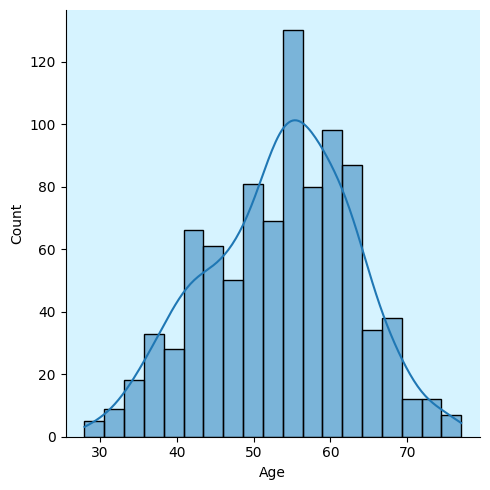

In [220]:
sns.displot(df['Age'], kde = True)

In [221]:
skewness_dist(df, "Age")

Skewness of the Age variable: -0.196
The distribution is left-skewed.


<Axes: ylabel='Age'>

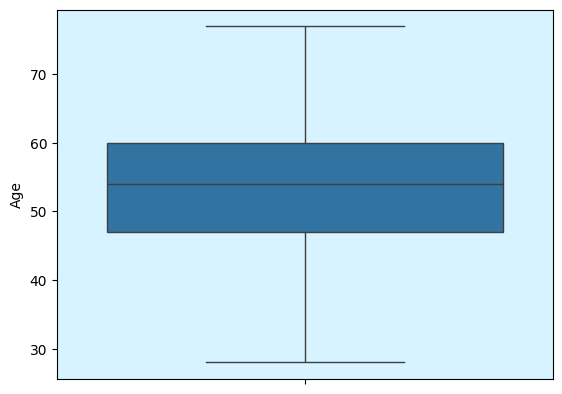

In [222]:
sns.boxplot(df['Age'])

In [223]:
#Outliers of Age variable
age_outliers, age_lower_bound, age_upper_bound = find_outliers(df['Age'])

print("Lower Bound:", age_lower_bound)
print("Upper Bound:", age_upper_bound)
print("Outliers:", len(age_outliers))

Lower Bound: 27.5
Upper Bound: 79.5
Outliers: 0


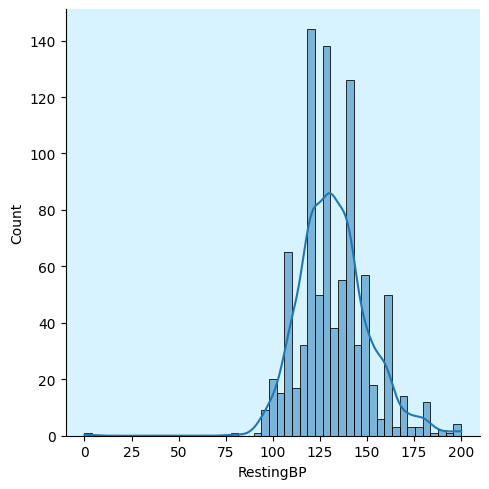

In [224]:
sns.displot(df['RestingBP'], kde = True)

In [225]:
skewness_dist(df, "RestingBP")

Skewness of the RestingBP variable: 0.180
The distribution is right-skewed.


<Axes: ylabel='RestingBP'>

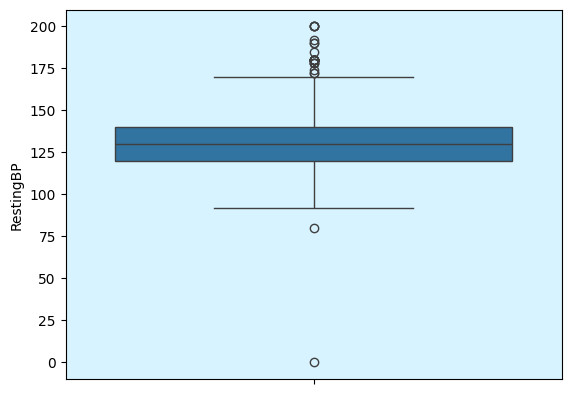

In [226]:
sns.boxplot(df['RestingBP'])

In [227]:
#Outliers of RestingBP variable
RestingBP_outliers, RestingBP_lower_bound, RestingBP_upper_bound = find_outliers(df['RestingBP'])

print("Lower Bound:", RestingBP_lower_bound)
print("Upper Bound:", RestingBP_upper_bound)
print("Outliers:", len(RestingBP_outliers))

Lower Bound: 90.0
Upper Bound: 170.0
Outliers: 28


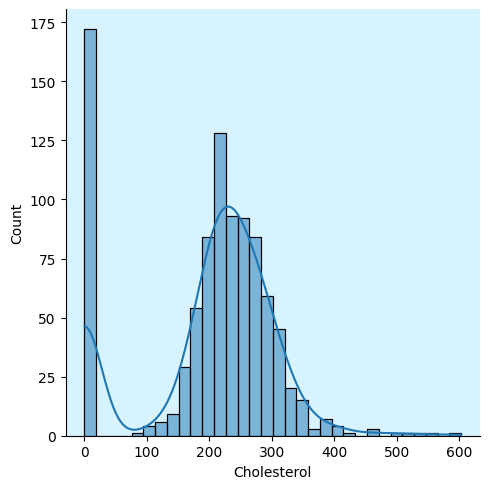

In [228]:
sns.displot(df['Cholesterol'], kde = True)

In [229]:
skewness_dist(df, "Cholesterol")

Skewness of the Cholesterol variable: -0.610
The distribution is left-skewed.


<Axes: ylabel='Cholesterol'>

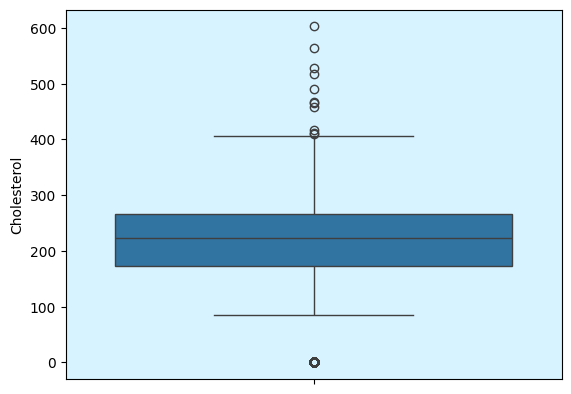

In [230]:
sns.boxplot(df['Cholesterol'])

In [231]:
#Outliers of Cholesterol variable
Cholesterol_outliers, Cholesterol_lower_bound, Cholesterol_upper_bound = find_outliers(df['Cholesterol'])

print("Lower Bound:",Cholesterol_lower_bound)
print("Upper Bound:", Cholesterol_upper_bound)
print("Outliers:", len(Cholesterol_outliers))

Lower Bound: 32.625
Upper Bound: 407.625
Outliers: 183


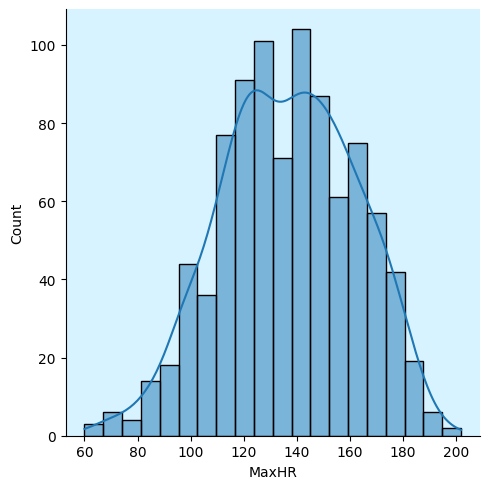

In [232]:
sns.displot(df['MaxHR'], kde = True)

In [233]:
skewness_dist(df, "MaxHR")

Skewness of the MaxHR variable: -0.144
The distribution is left-skewed.


<Axes: ylabel='MaxHR'>

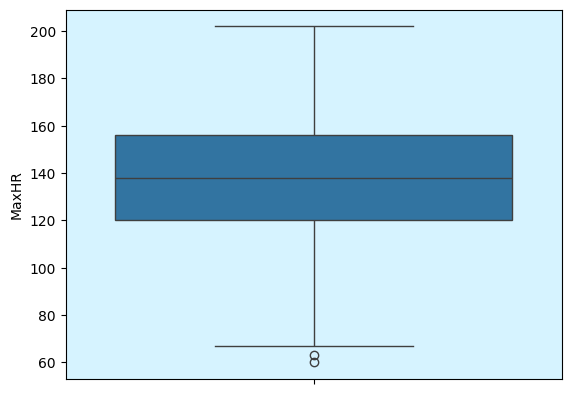

In [234]:
sns.boxplot(df['MaxHR'])

In [235]:
#Outliers of MaxHR variable
MaxHR_outliers, MaxHR_lower_bound, MaxHR_upper_bound = find_outliers(df['MaxHR'])

print("Lower Bound:",MaxHR_lower_bound)
print("Upper Bound:", MaxHR_upper_bound)
print("Outliers:", len(MaxHR_outliers))

Lower Bound: 66.0
Upper Bound: 210.0
Outliers: 2


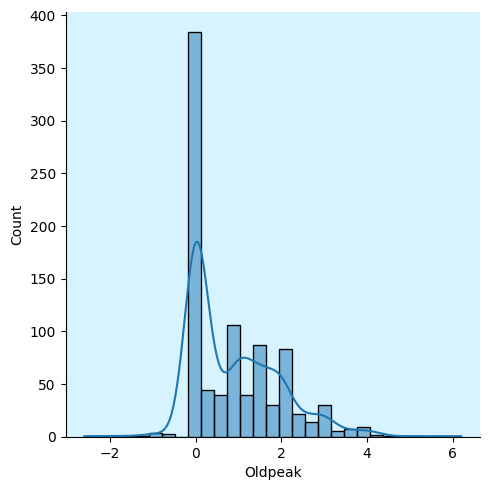

In [236]:
sns.displot(df['Oldpeak'], kde = True)

In [237]:
skewness_dist(df, "Oldpeak")

Skewness of the Oldpeak variable: 1.023
The distribution is right-skewed.


<Axes: ylabel='Oldpeak'>

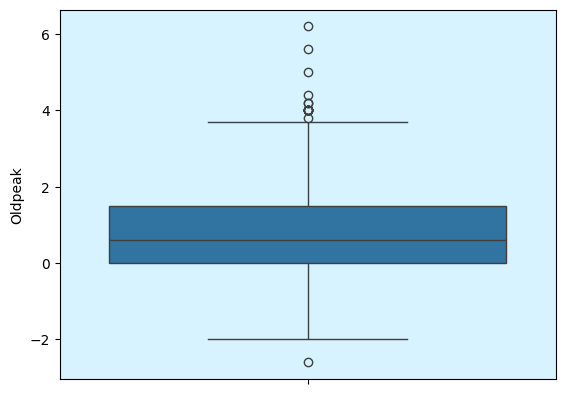

In [238]:
sns.boxplot(df['Oldpeak'])

In [239]:
#Outliers of Oldpeak variable
Oldpeak_outliers, Oldpeak_lower_bound, Oldpeak_upper_bound = find_outliers(df['Oldpeak'])

print("Lower Bound:",Oldpeak_lower_bound)
print("Upper Bound:", Oldpeak_upper_bound)
print("Outliers:", len(Oldpeak_outliers))

Lower Bound: -2.25
Upper Bound: 3.75
Outliers: 16


##### Categorical Data

In [240]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA'] 

    category_counts = df[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4)) 

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = df[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

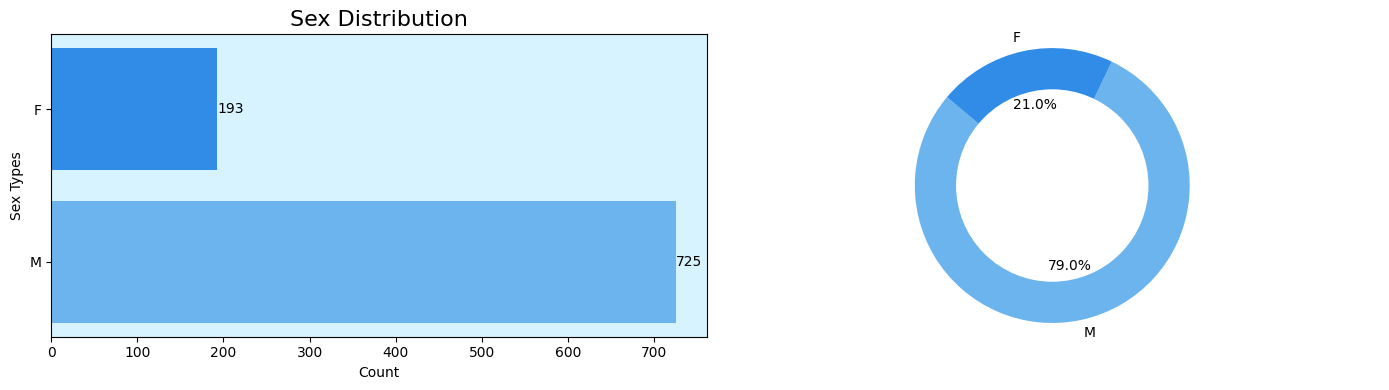

In [241]:
# Sex
bar_donut_chart("Sex")

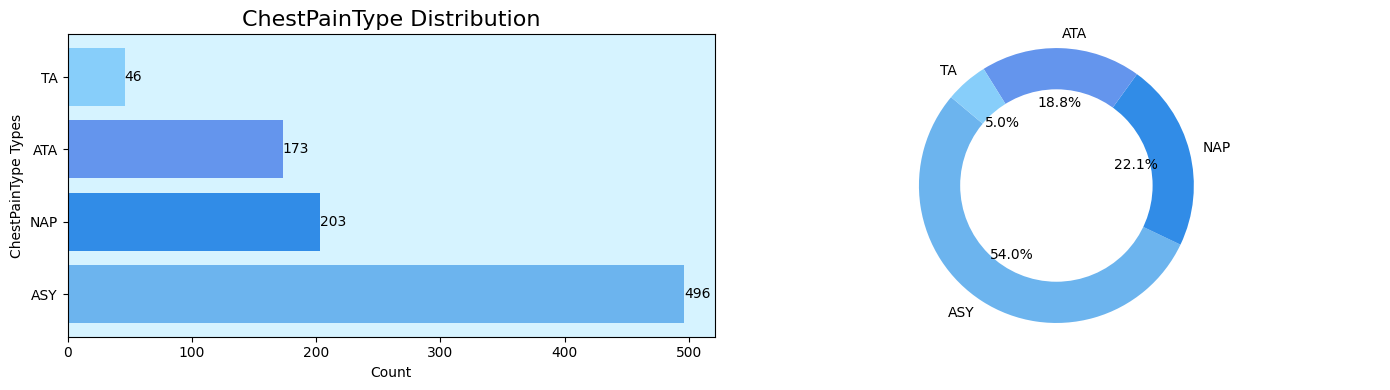

In [242]:
bar_donut_chart("ChestPainType")

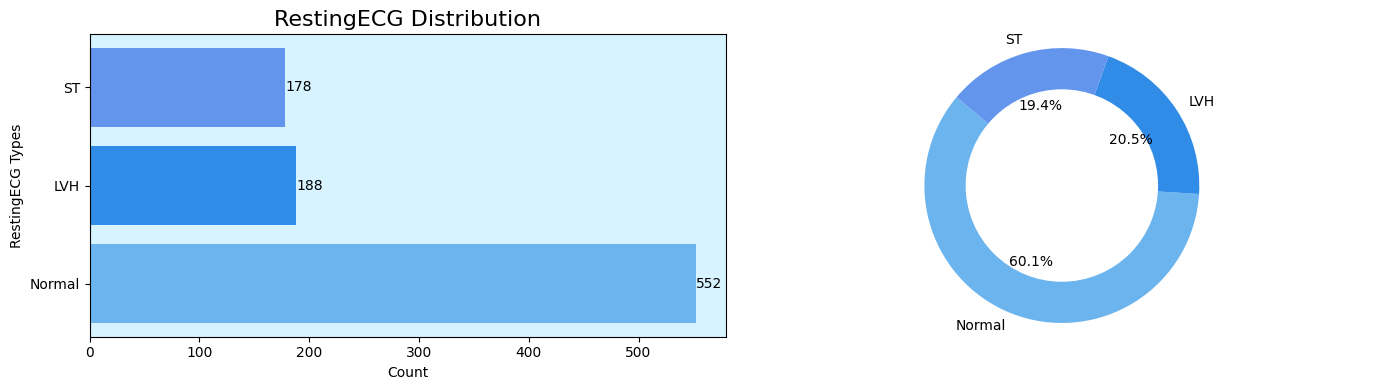

In [243]:
bar_donut_chart("RestingECG")

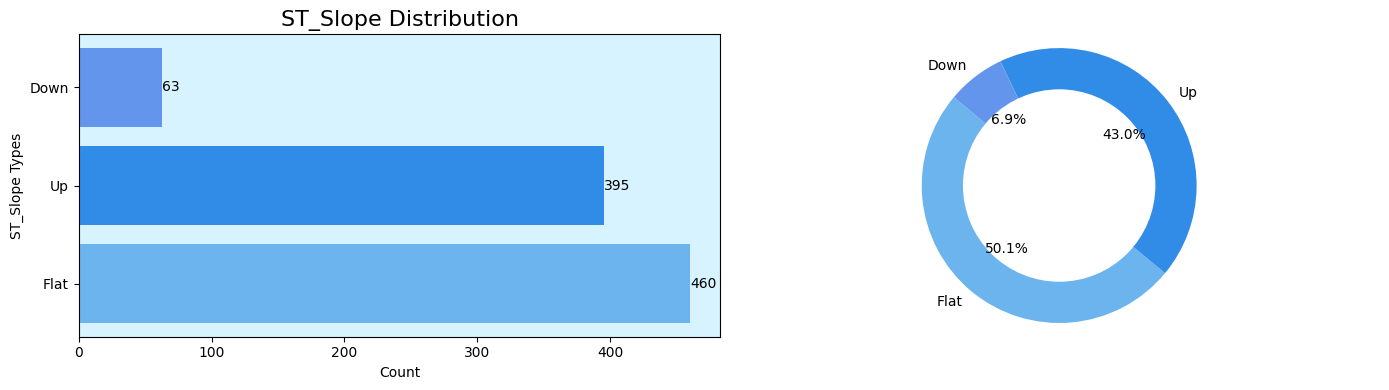

In [244]:
bar_donut_chart("ST_Slope")

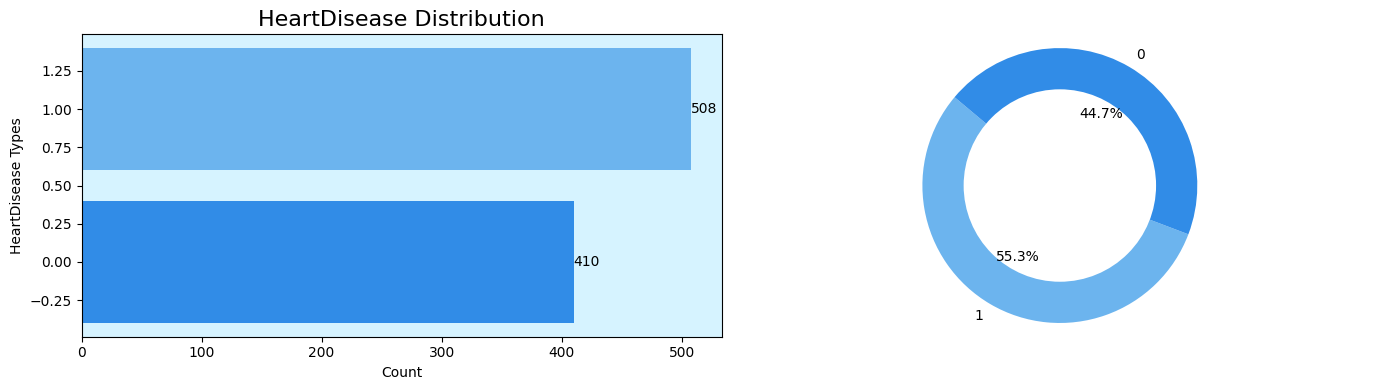

In [245]:
bar_donut_chart("HeartDisease")

#### Bivariate Analysis


##### Numerical Data

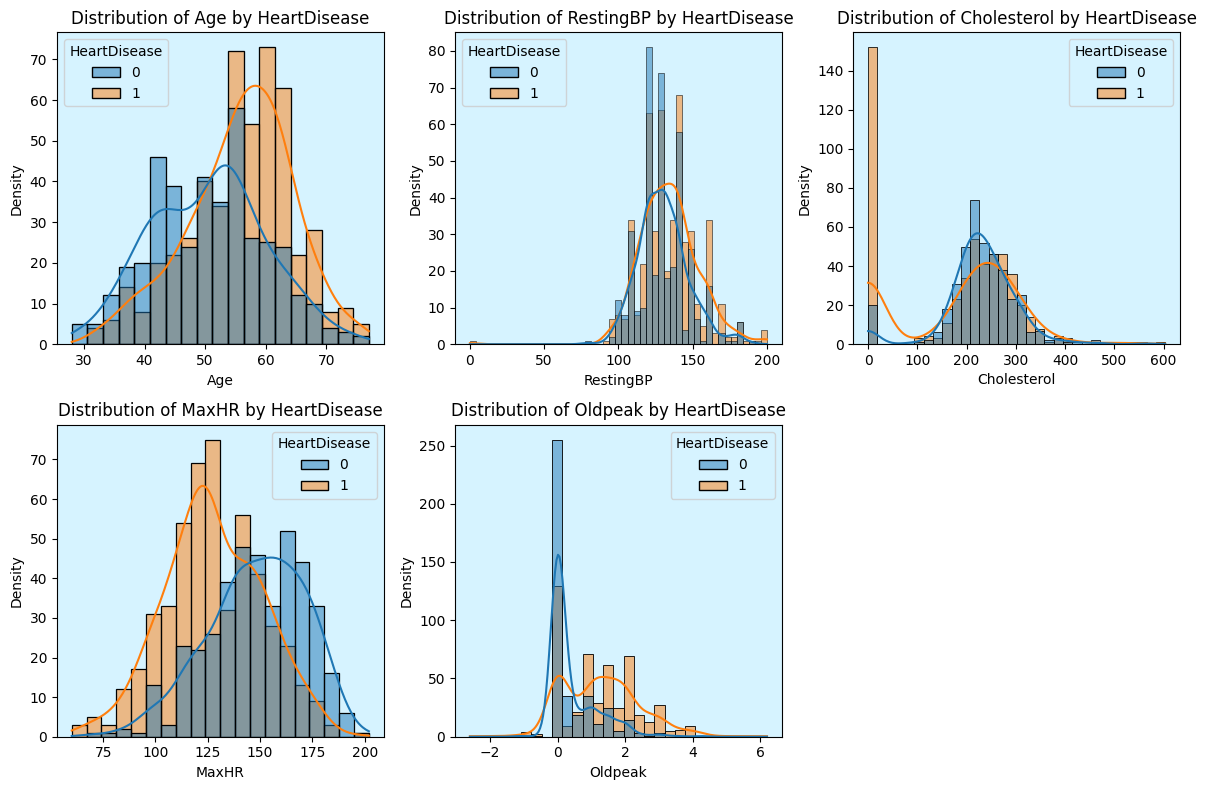

In [246]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by HeartDisease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

##### Categorical Data

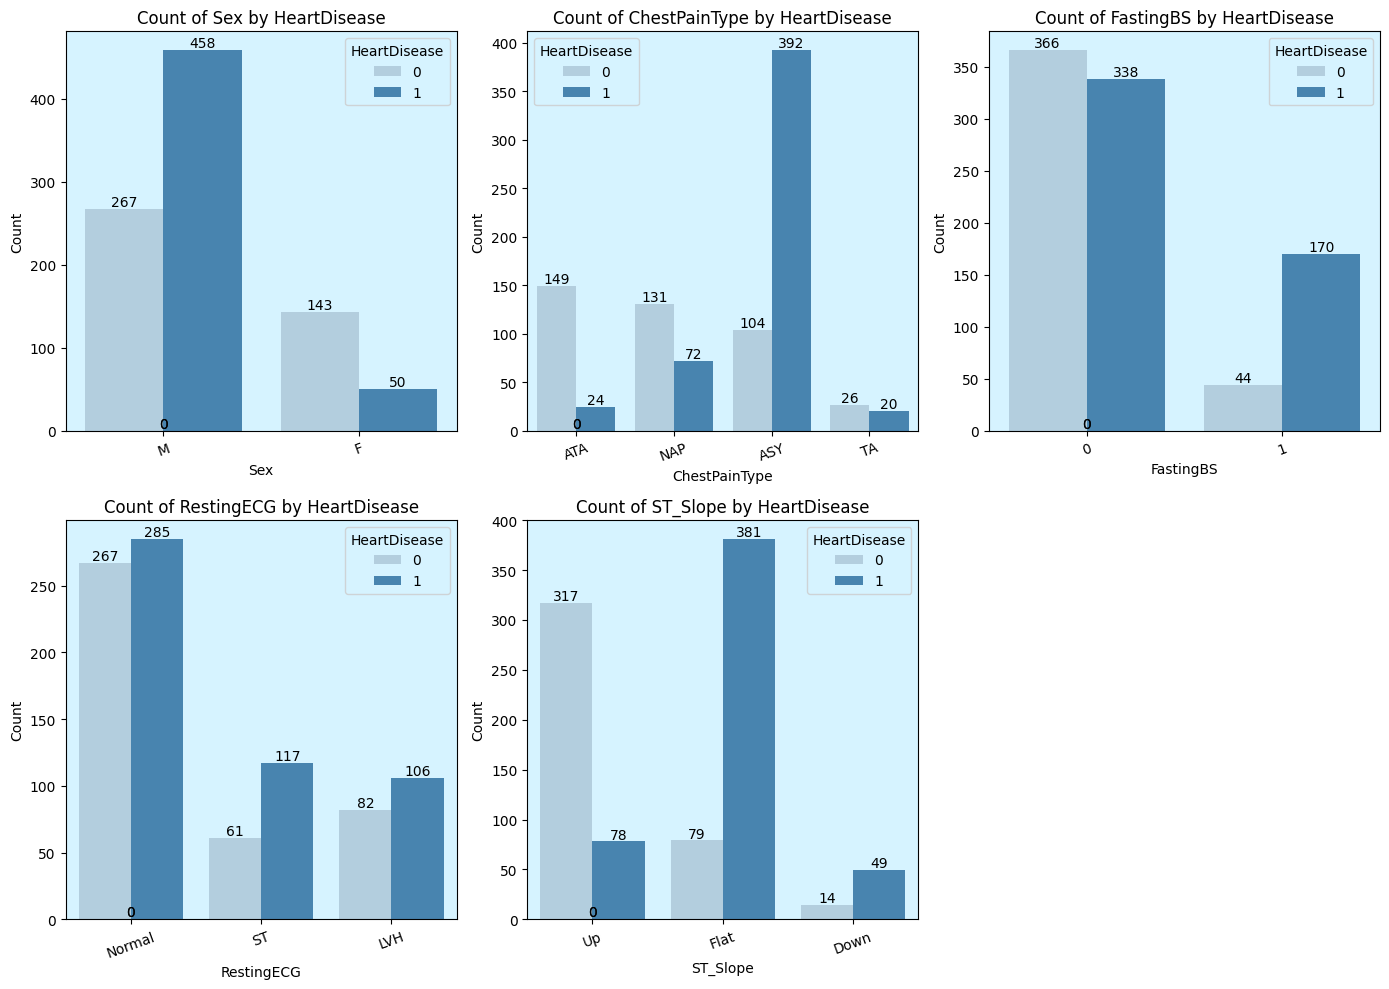

In [247]:
#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ST_Slope']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=df, x=feature, hue='HeartDisease', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by HeartDisease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='black')
        
axes[1, 2].remove()    
plt.tight_layout()
plt.show()


#### Correlation Analysis

##### Heatmap

In [263]:
df_correlation = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','FastingBS','HeartDisease']].corr()
df_correlation

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612,0.198039,0.282039
RestingBP,0.254399,1.000000,0.100893,-0.112135,0.164803,0.070193,0.107589
Cholesterol,-0.095282,0.100893,1.000000,0.235792,0.050148,-0.260974,-0.232741
MaxHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691,-0.131438,-0.400421
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000,0.052698,0.403951
FastingBS,0.198039,0.070193,-0.260974,-0.131438,0.052698,1.000000,0.267291
HeartDisease,0.282039,0.107589,-0.232741,-0.400421,0.403951,0.267291,1.000000


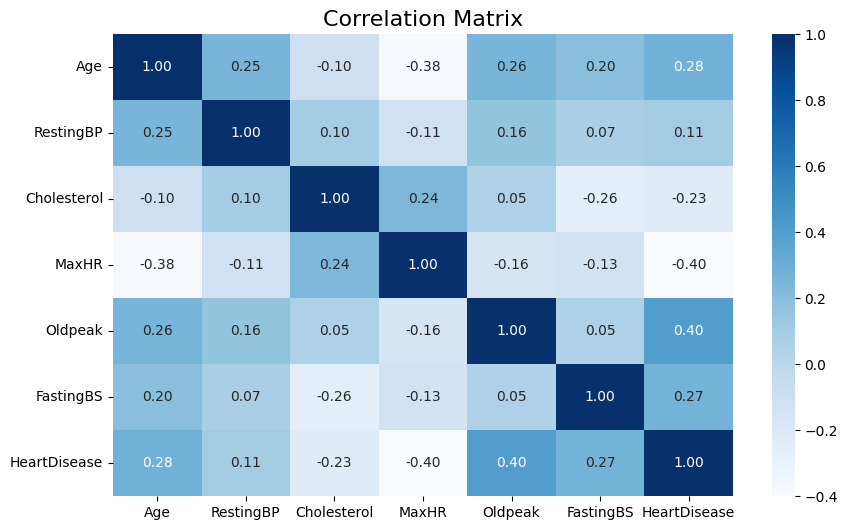

In [267]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

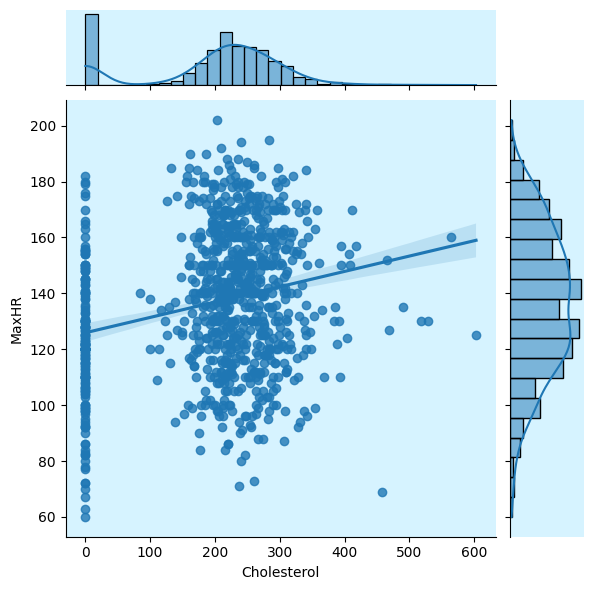

In [269]:
sns.jointplot(x = 'Cholesterol' , y = 'MaxHR', data = df, kind = 'reg')

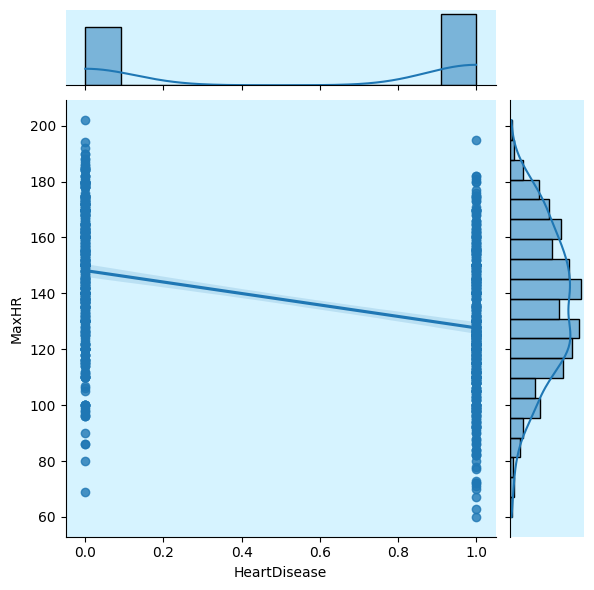

In [272]:

sns.jointplot(x = 'HeartDisease' , y = 'MaxHR', data = df, kind = 'reg')

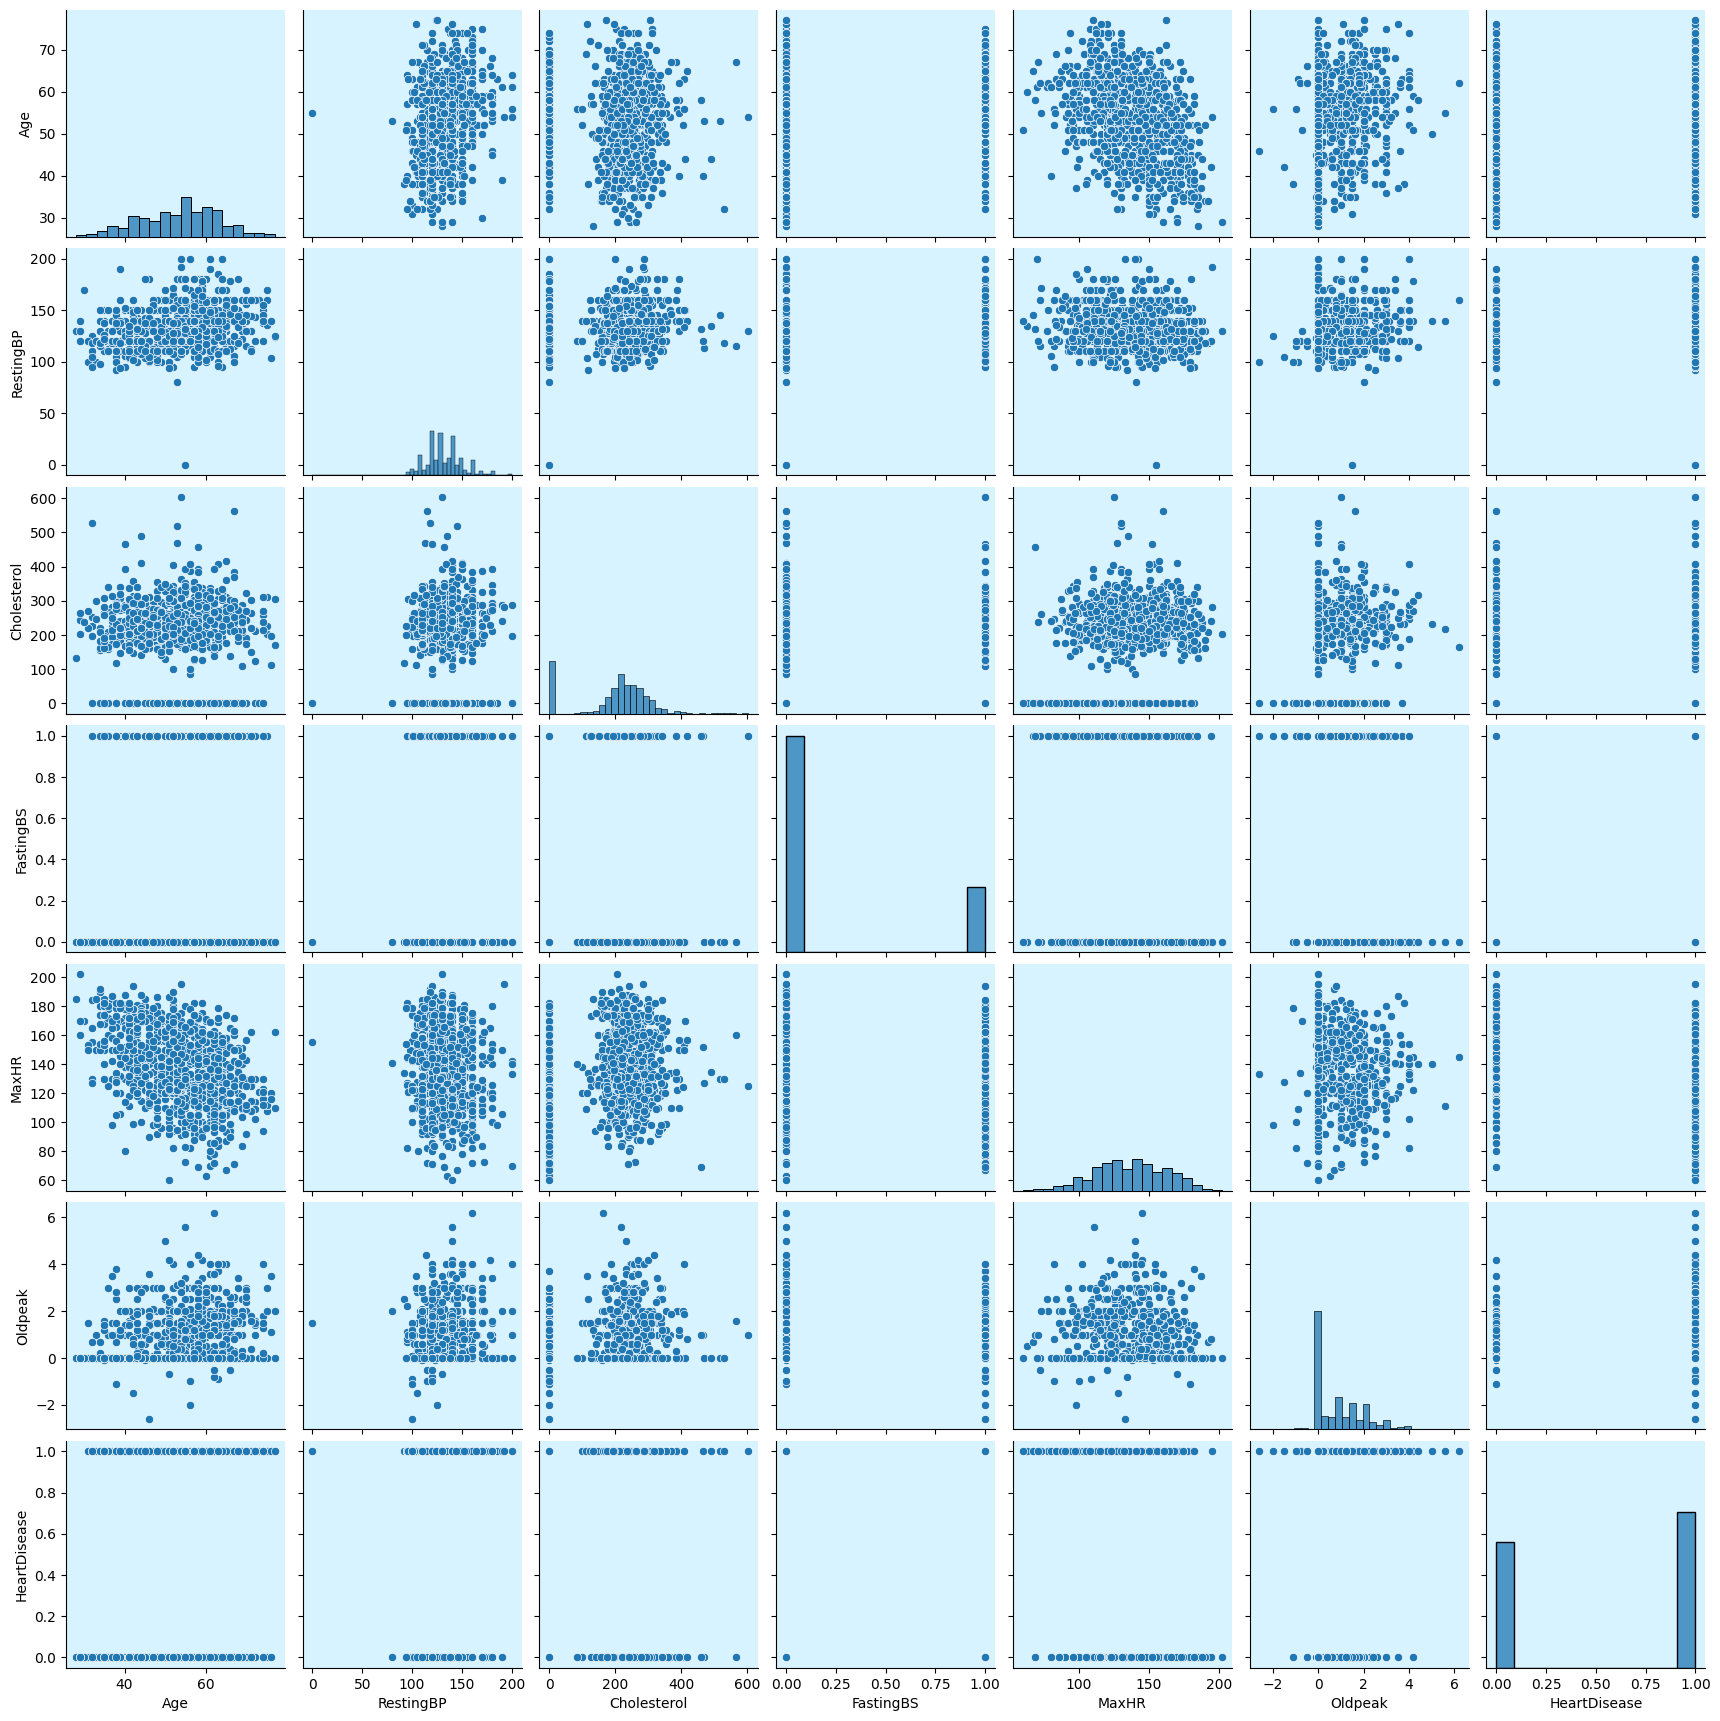

In [274]:
sns.pairplot(df)